In [1]:
%matplotlib inline

**Example code 18 : Export python script to reproduce the pCMV-Targe-AID**  
We simulated the construction process of pCMV-Target-AID plasmid, which was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID. They were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. The construction process was simulated by using dnaquine, and the GenBank output was generated. Dnaquine then loads the GenBank file and creates quine code tracing the construction process to reproduce the GenBank file. 

In [2]:
import sys 
sys.path.append("../../")
from dnaquine import *

set_namespace(globals()) 
#Read template plasimid GenBank inputs
DNA(record="input/addgene_102919.gbk", product="pCMV_ABE", project="pCMV_ABE")
DNA(record="input/addgene_79620.gbk", product="pCMV_nCas_PmCDA1_ugi", project="pCMV-nCas-PmCDA1-ugi")

#Simulate PCR to amlify N-terminus of Target-AID
description1 = "The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs RS045/HM129."
DNA(seq="GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG", product="RS045",   process_description=description1)
DNA(seq="CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", product="HM129", process_description=description1)
pCMV_nCas_PmCDA1_ugi.searchdna(RS045.seq[-18:], key_attribute="sequence", product="FW", process_description=description1) #Search FW primer binding region
pCMV_nCas_PmCDA1_ugi.searchdna(HM129.seq[-18:], key_attribute="sequence", product="RV", process_description=description1) #Search RV primer binding region
cropdna(pCMV_nCas_PmCDA1_ugi, FW[0].end, RV[0].start, product="frag1", process_description=description1)
modifyends(frag1, RS045.seq, flipdna(HM129, product="HM129comp").seq, product="frag1", process_description=description1) #Simulate PCR

#Simulate PCR to amlify C-terminus of Target-AID
description2 = "The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs HM128/RS046."
DNA(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC", product="HM128", process_description=description2)
DNA(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046", process_description=description2)
pCMV_nCas_PmCDA1_ugi.searchdna(HM128.seq[-18:], key_attribute="sequence", product="FW", process_description=description2)
pCMV_nCas_PmCDA1_ugi.searchdna(RS046.seq[-18:], key_attribute="sequence", product="RV", process_description=description2)
cropdna(pCMV_nCas_PmCDA1_ugi, FW[0].end, RV[0].start, product="frag2", process_description=description2)
modifyends(frag2, HM128.seq, flipdna(RS046, product="RS046comp").seq, product="frag2", process_description=description2)

#Simulate PCR to amplify a backbone fragment
description3 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048."
DNA(seq="ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", product="RS047", process_description=description3) 
DNA(seq="CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG", product="RS048", process_description=description3)
pCMV_ABE.searchdna(RS047.seq[-18:], key_attribute="sequence", product="FW", process_description=description3)[0] 
pCMV_ABE.searchdna(RS048.seq[-18:], key_attribute="sequence", product="RV", process_description=description3)[0]
cropdna(pCMV_ABE, FW[0].end, RV[0].start, product="frag3", process_description=description3)
modifyends(frag3, RS047.seq, flipdna(RS048, product="RS048comp").seq, product="frag3", process_description=description3)

#Gibson Assembly
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed\
 by assembling two insert fragments and a backbone fragments."
modifyends(frag1, "*{25}/-{25}","-{28}/*{28}", product="frag1", process_description=description4)
modifyends(frag2, "*{28}/-{28}","-{25}/*{25}", product="frag2", process_description=description4)
modifyends(frag3, "*{25}/-{25}","-{25}/*{25}", product="frag3", process_description=description4) 
joindna(frag1, frag2, frag3, topology="circular", project="pCMV-Target-AID", product="pCMV_Target_AID", process_description=description4)

#Add primer information
"""
primers = [RS045,HM129,RS046,HM128,RS047,RS048]
for primer in primers:
    feature_id = primer.project
    editdna(pCMV_Target_AID, query=primer, key_attribute="sequence", target_attribute="feature_id", operation=createattribute(feature_id), new_copy=False)
    editdna(pCMV_Target_AID, query=feature_id, key_attribute="feature_id", target_attribute="feature_type", operation=replaceattribute("primer_bind"), new_copy=False)
    editdna(pCMV_Target_AID, query=feature_id, key_attribute="feature_id", target_attribute="qualifier:label", operation=createattribute(feature_id), new_copy=False)
"""
pCMV_Target_AID.writedna("output/pCMV-Target-AID.gbk")
pCMV_Target_AID.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
3100        source        pCMV-Target-AID     0      8752  +       
100         CDS           SV40 NLS            19     40    +       
200         source        null                33     5363  +       
300         CDS           Cas9(D10A)          64     4168  +       
500         CDS           SV40 NLS            4180   4201  +       
600         CDS           3xFLAG              4408   4474  +       
700         CDS           SV40 NLS            5107   5128  +       
800         CDS           UGI                 5134   5386  +       
1000        source        null                5409   8745  +       
1100        primer_bind   BGH-rev             5411   5429  -       
1200        polyA_signal  bGH poly(A) signal  5417   5642  +       
1300        primer_bind   M13 rev             5712   5729  -       
1400        primer_bind   M13 Reverse         5712   5729  -       
1500        primer_bind   M13/pUC Reverse     57

In [3]:
pCMV_Target_AID = DNA(record="output/pCMV-Target-AID.gbk")
quine(pCMV_Target_AID)
quine(pCMV_Target_AID, output="output/pCMV-Target-AID_reconstruction.py")

import sys
sys.path.append("../../")
from dnaquine import *
set_namespace(globals())
DNA(seq=None, record='input/addgene_102919.gbk', project='pCMV_ABE', topology='linear', format=None, product='pCMV_ABE', process_description=None)
DNA(seq=None, record='input/addgene_79620.gbk', project='pCMV-nCas-PmCDA1-ugi', topology='linear', format=None, product='pCMV_nCas_PmCDA1_ugi', process_description=None)

description0 = 'The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129.'
DNA(seq='GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG', record=None, project='dna', topology='linear', format=None, product='RS045', process_description=description0)
DNA(seq='CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA', record=None, project='dna', topology='linear', format=None, product='HM129', process_description=description0)
pCMV_nCas_PmCDA1_ugi.searchdna(query=RS045.seq[-18:], key_attribute='sequence', min_match=None, max_mismatch=0, product='FW',

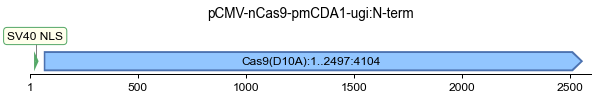

In [4]:
frag1.project = "pCMV-nCas9-pmCDA1-ugi:N-term"
fig1=visualize(frag1)

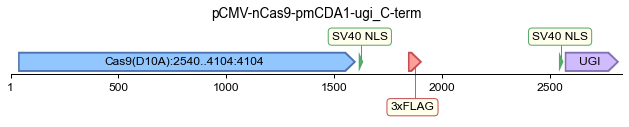

In [5]:
frag2.project = "pCMV-nCas9-pmCDA1-ugi_C-term"
fig2=visualize(frag2)
#fig2=visualize(cropdna(frag2,500,1000))

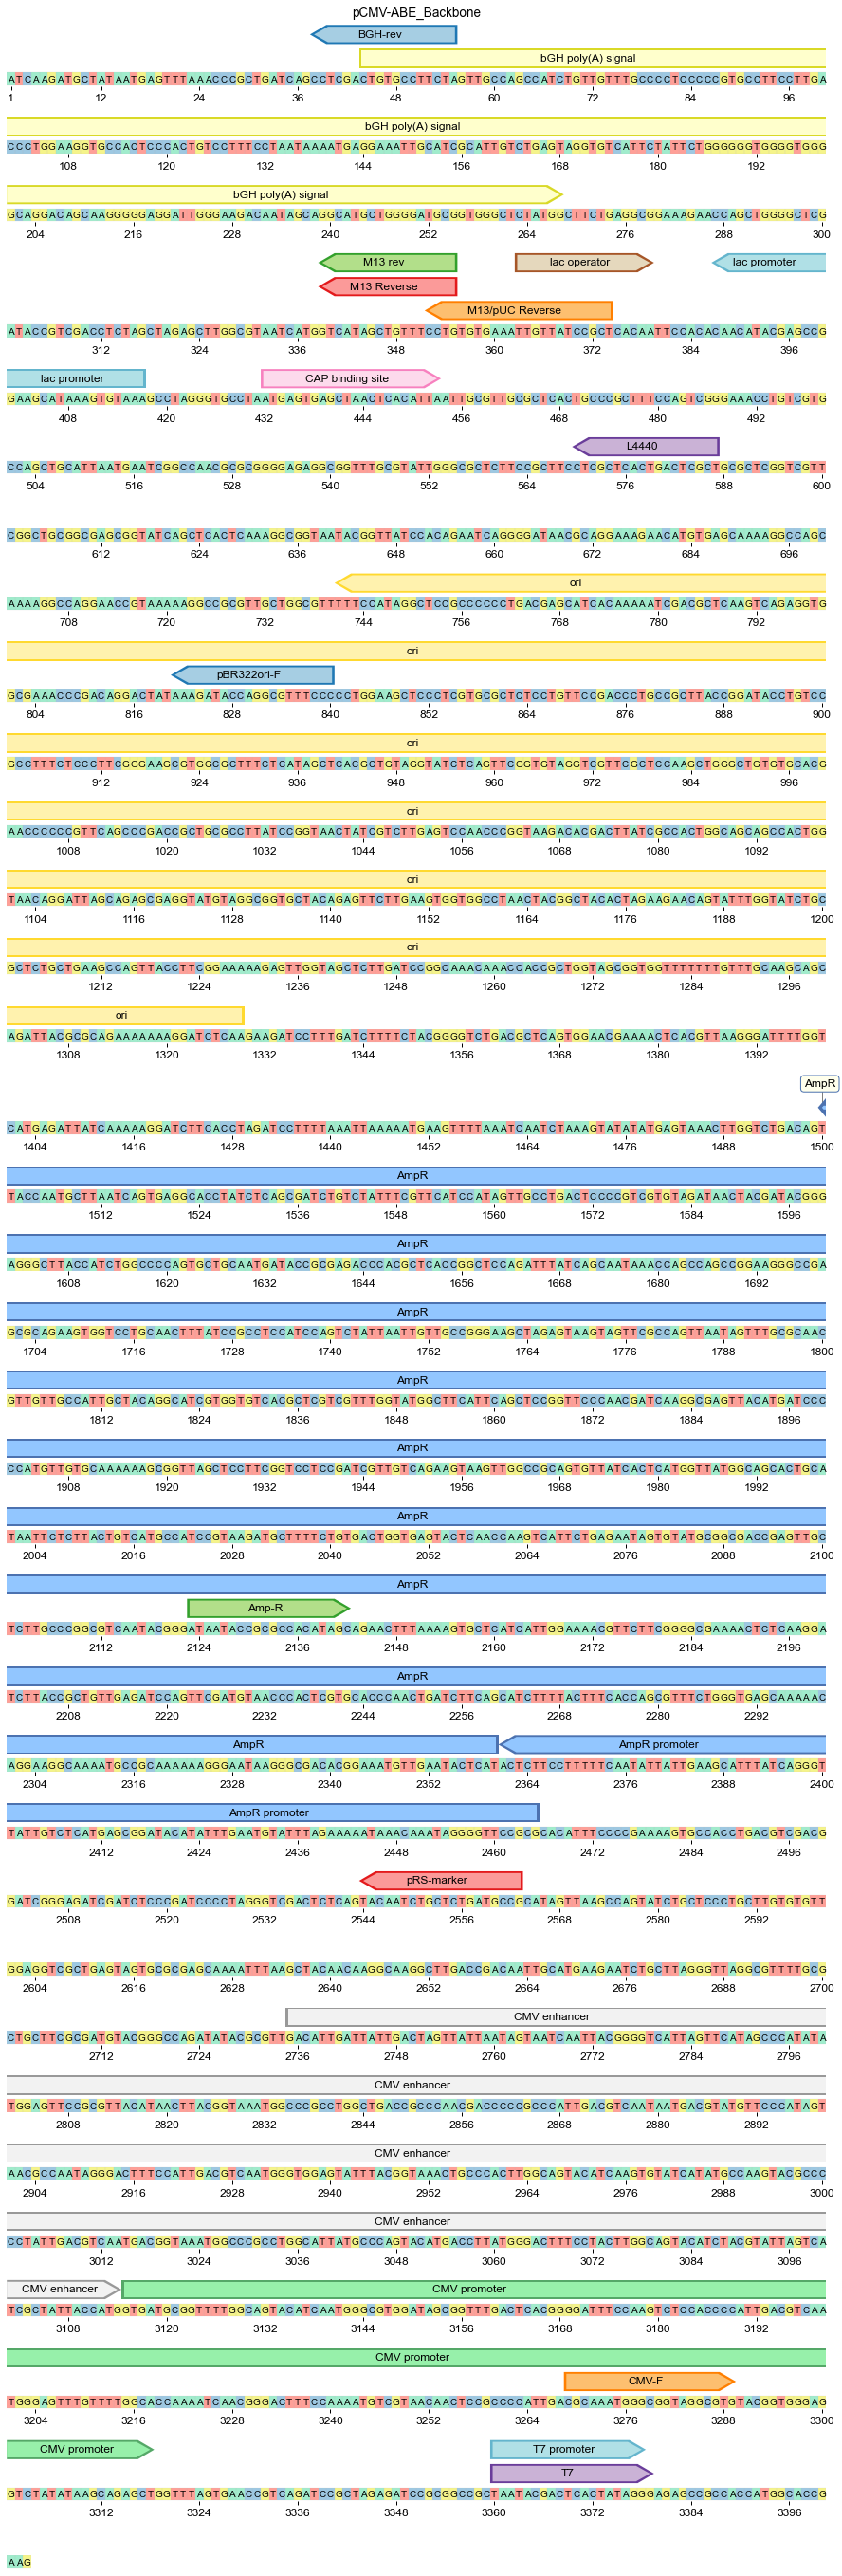

In [6]:
frag3.project = "pCMV-ABE_Backbone"
fig3=visualize(frag3, linebreak=100, seq=True)

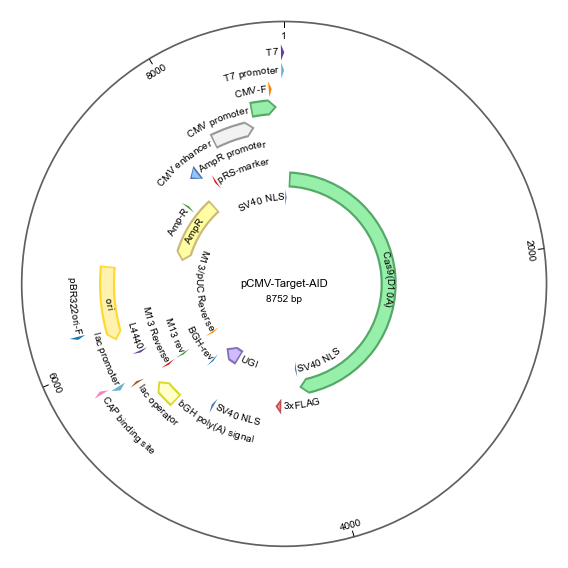

In [7]:
fig4 = visualize(pCMV_Target_AID, map_view="circular")